In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Q4. Bootstrap

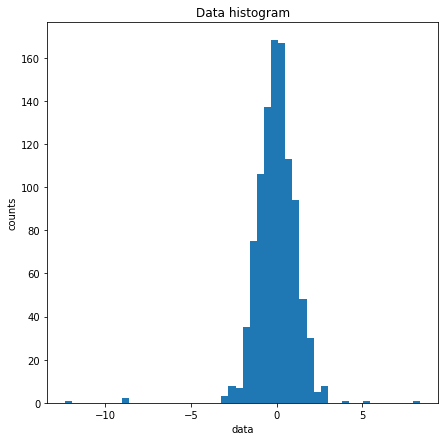

In [38]:
distr = np.random.normal(0,1,1000)  # main distribution
outliers = np.random.normal(0,10,10) # outliers

data = np.concatenate((distr,outliers)) # concatenate the two arrays

np.random.shuffle(data) # shuffle the data array

fig = plt.figure(figsize=(7,7))

plt.hist(data,bins=50)
plt.xlabel('data')
plt.ylabel('counts')
plt.title('Data histogram')
plt.show()

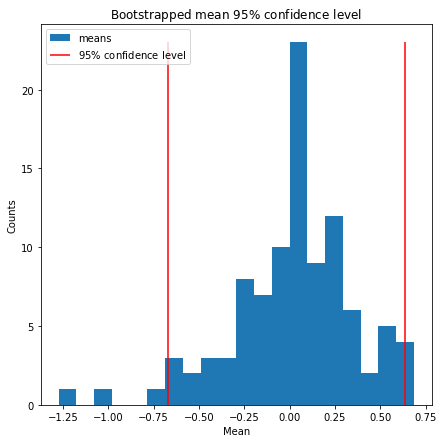

In [65]:
N_bs = 100
bs_sample = 10

mean = np.zeros(N_bs)

for n in range(N_bs):
    resample = np.random.choice(data,bs_sample,replace=True)
    mean[n] = np.mean(resample)

perc_2_5 = np.percentile(mean,2.5)
perc_97_5 = np.percentile(mean,97.5)

# plot
fig = plt.figure(figsize=(7,7))

mean_hist = plt.hist(mean,bins=20,label='means')
plt.vlines(perc_2_5,0,max(mean_hist[0]),color='red',label=r'$95\%$ confidence level')
plt.vlines(perc_97_5,0,max(mean_hist[0]),color='red')
plt.title(r'Bootstrapped mean $95\%$ confidence level')
plt.xlabel('Mean')
plt.ylabel('Counts')
plt.legend()

# Q3. Standard deviation

In [66]:
def compute_std(x):
    
    # compute the avg
    tot_sum = 0
    
    for i in range(len(x)):
        tot_sum += x[i]
        
    avg = tot_sum/len(x)
    
    # compute std:
    squared_res = 0
    for i in range(len(x)):
        squared_res += (x[i]-avg)**2
        
    var = squared_res/len(x)
    std = np.sqrt(var)
    
    return std

In [67]:
import time

In [71]:
# test my function
time0 = time.time()
my_std = compute_std(data)
time1 = time.time()
my_deltaT = time1-time0

print('Computed std: %.3f in %.4f s'%(my_std,my_deltaT))

# test np.std
time2 = time.time()
np_std = np.std(data)
time3 = time.time()
np_deltaT = time3-time2

print('Computed std: %.3f in %.4f s'%(np_std,np_deltaT))

Computed std: 1.187 in 0.0020 s
Computed std: 1.187 in 0.0010 s
